In [9]:
from pycaret.regression import *
import seaborn as sns
import pandas as pd
import datetime

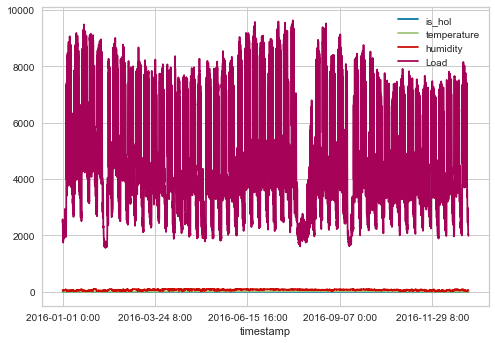

In [23]:
dataset = pd.read_csv("loadexample_24.csv")
visualer = dataset.set_index("timestamp")
visualer.plot()

In [3]:
# Environment 세팅 - > 알아서 전처리랑 피쳐처리해줌
setter = setup(data=dataset, target="Load", train_size=0.7, data_split_shuffle = False, ignore_features=['temperature', 'humidity'])

 
Setup Succesfully Completed.


,Description,Value
0,session_id,3605
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(8784, 5)"
4,Missing Values,False
5,Numeric Features,2
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [4]:
# 모델 비교, 특정 모델에서 에러 밸생시 exclude=['모델명(ex. RANSAC)'] 넣어주면 해결...
mats = compare_models(n_select=3, fold=5, sort="R2")

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Extreme Gradient Boosting,657.6907,1007620.6694,943.7257,0.7513,0.2354,0.1889,0.1855
1,Random Forest,644.7852,998914.9511,940.0385,0.7510,0.2328,0.1859,0.3441
2,Light Gradient Boosting Machine,652.0691,1007810.5511,940.5557,0.7505,0.2336,0.1883,0.0469
3,CatBoost Regressor,657.0475,1027208.2041,952.0993,0.7464,0.2405,0.1918,1.1246
4,Extra Trees Regressor,677.1555,1100585.4811,994.9953,0.7251,0.2415,0.1923,0.3472
5,Decision Tree,683.6568,1123670.6010,1009.0438,0.7188,0.2461,0.1936,0.0218
6,Gradient Boosting Regressor,787.7488,1199128.0121,1054.6179,0.7026,0.2603,0.2242,0.3327
7,Ridge Regression,857.9452,1342917.7581,1125.5199,0.6635,0.3186,0.2545,0.0068
8,Bayesian Ridge,857.8638,1343175.8893,1125.6098,0.6634,0.3188,0.2545,0.0126
9,TheilSen Regressor,884.4504,1354068.7922,1136.7924,0.6619,0.3097,0.2496,2.4416


In [5]:
blendedModels = blend_models(estimator_list=mats, fold=5, optimize='R2')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,799.2637,1028949.5190,1014.3715,0.7705,0.2938,0.2364
1,396.2346,330073.7296,574.5204,0.8979,0.1276,0.0861
2,498.0961,597421.4681,772.9304,0.8309,0.1943,0.1481
3,579.9530,536297.2561,732.3232,0.8742,0.1535,0.1177
4,947.0287,2445674.6188,1563.8653,0.4027,0.3877,0.3410
Mean,644.1152,987683.3183,931.6022,0.7552,0.2314,0.1858
SD,201.3508,763668.1991,346.1224,0.1815,0.0965,0.0924


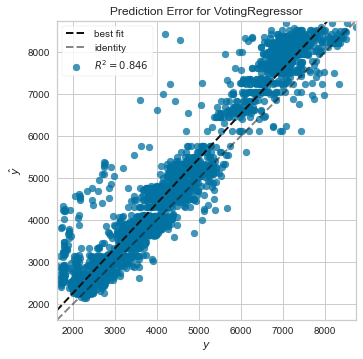

In [6]:
plot_model(blendedModels, plot='error')

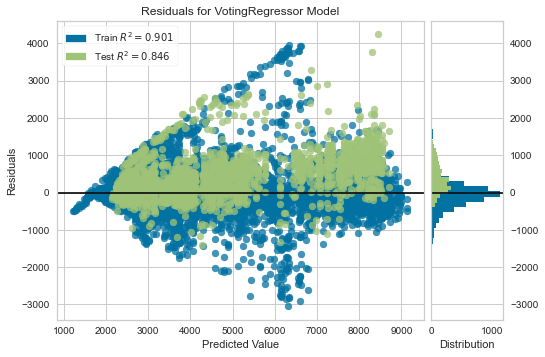

In [7]:
plot_model(blendedModels, plot='residuals')

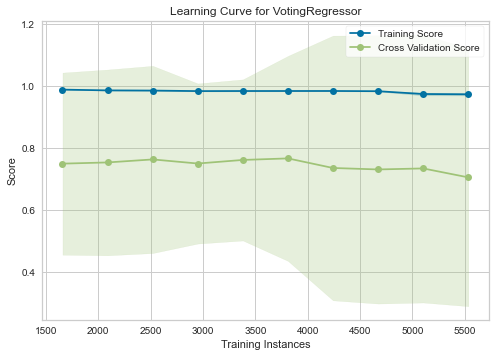

In [9]:
plot_model(blendedModels, plot='learning')

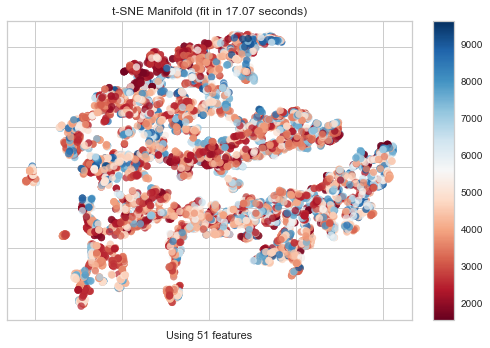

In [10]:
plot_model(blendedModels, plot='manifold')

In [32]:
testList = []
datetimer = datetime.datetime(year=2017, month=1, day=1, hour=0)
print(datetimer)
pluser = datetime.timedelta(hours=1)
while datetimer != datetime.datetime(year=2017, month=12, day=31, hour=23) :
    temp = []
    temp.append(datetimer)
    datetimer += pluser
    ishol = 0
    if (datetimer.day == 1 and datetimer.month == 1) or (datetimer.day == 1 and datetimer.month==3) or (datetimer.day == 3 and datetimer.month==5) or (datetimer.day == 5 and datetimer.month==5) or(datetimer.day == 6 and datetimer.month==6) or (datetimer.day == 15 and datetimer.month==8) or(datetimer.day == 3 and datetimer.month==10) or (datetimer.day == 9 and datetimer.month==10) or(datetimer.day == 25 and datetimer.month==12) :
         ishol = 1
    temp.append(ishol)
    testList.append(temp)
testList = pd.DataFrame(testList, columns=['timestamp', 'is_hol'])
testList

2017-01-01 00:00:00


,timestamp,is_hol
0,2017-01-01 00:00:00,1
1,2017-01-01 01:00:00,1
2,2017-01-01 02:00:00,1
3,2017-01-01 03:00:00,1
4,2017-01-01 04:00:00,1
...,...,...
8754,2017-12-31 18:00:00,0
8755,2017-12-31 19:00:00,0
8756,2017-12-31 20:00:00,0
8757,2017-12-31 21:00:00,0


In [33]:
pred_holdout = predict_model(blendedModels, data=testList)
pred_holdout

,timestamp,is_hol,Label
index,,,
0,2017-01-01 00:00:00,1,2497.8482
1,2017-01-01 01:00:00,1,2608.7196
2,2017-01-01 02:00:00,1,2614.9009
3,2017-01-01 03:00:00,1,2462.5473
4,2017-01-01 04:00:00,1,2410.8331
...,...,...,...
8754,2017-12-31 18:00:00,0,2044.1777
8755,2017-12-31 19:00:00,0,1977.0102
8756,2017-12-31 20:00:00,0,2036.9917


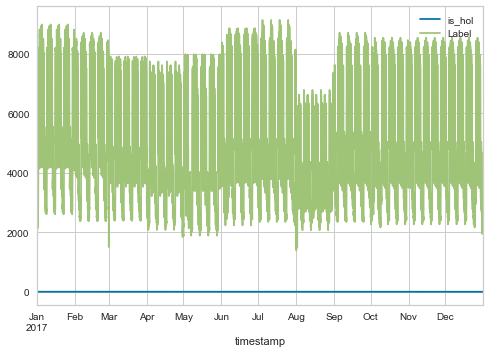

In [34]:
preder = pred_holdout.set_index('timestamp')
preder.plot()